# ML-Assignment- House Price prediction


## *Vivek Muraleedharan
## * E20037

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing Data sets from the system

In [2]:
test_data =pd.read_csv(r'C:\Users\CTS\Documents\remachinelearningmaterials\wk3_kc_house_test_data.csv')
train_data=pd.read_csv(r'C:\Users\CTS\Documents\remachinelearningmaterials\wk3_kc_house_train_data.csv')
validation_data=pd.read_csv(r'C:\Users\CTS\Documents\remachinelearningmaterials\wk3_kc_house_valid_data..csv') 
                       

In [3]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [4]:
train_data.shape


(9761, 21)

### checking for null values in the data




In [5]:
print(train_data.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Dropping unwated columns 

In [6]:
#test= test_data.drop(['id','date'],axis=1)
train=train_data.drop(['id','date'],axis=1)

In [7]:
#print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9761 non-null   float64
 1   bedrooms       9761 non-null   int64  
 2   bathrooms      9761 non-null   float64
 3   sqft_living    9761 non-null   int64  
 4   sqft_lot       9761 non-null   int64  
 5   floors         9761 non-null   float64
 6   waterfront     9761 non-null   int64  
 7   view           9761 non-null   int64  
 8   condition      9761 non-null   int64  
 9   grade          9761 non-null   int64  
 10  sqft_above     9761 non-null   int64  
 11  sqft_basement  9761 non-null   int64  
 12  yr_built       9761 non-null   int64  
 13  yr_renovated   9761 non-null   int64  
 14  zipcode        9761 non-null   int64  
 15  lat            9761 non-null   float64
 16  long           9761 non-null   float64
 17  sqft_living15  9761 non-null   int64  
 18  sqft_lot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC54DB3E48>,
      dtype=object)

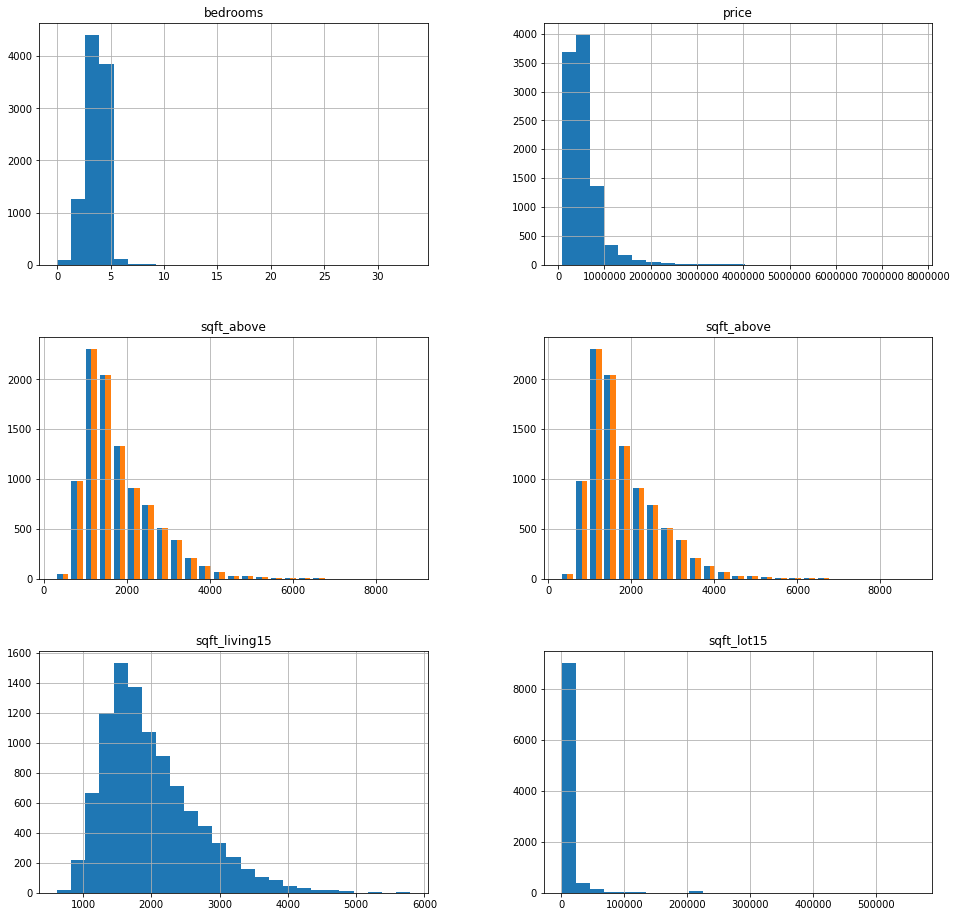

In [8]:
column=train[['price','bedrooms','sqft_living15','sqft_lot15','sqft_above','sqft_above']]
column.hist(bins=25,figsize=(16,16))


Text(0, 0.5, 'Price')

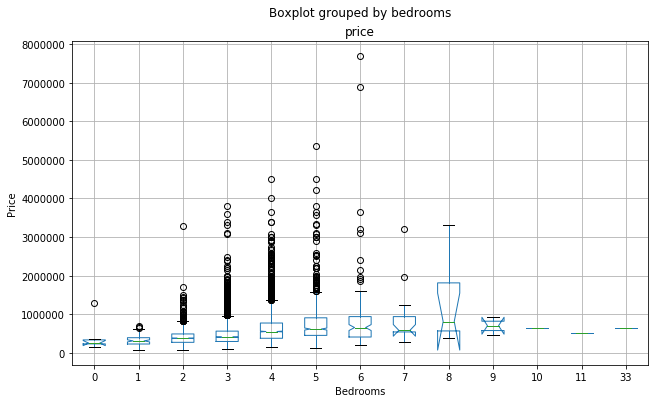

In [9]:
column.boxplot(column='price',notch=True,figsize=(10,6),by='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

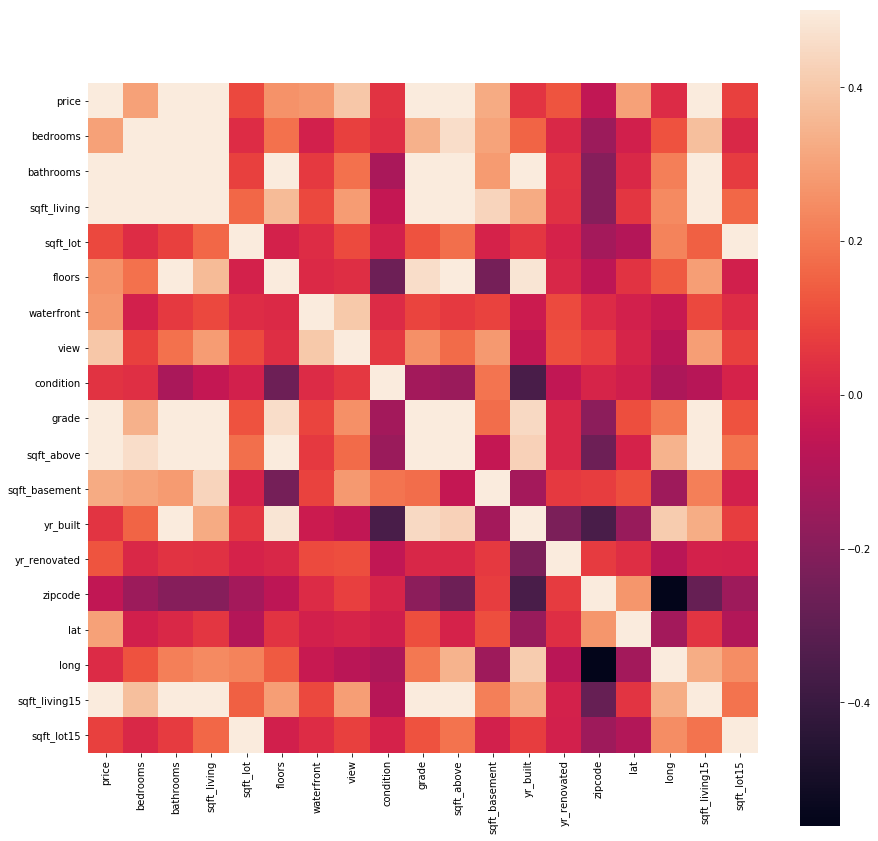

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15))
corr= train.corr()
sns.heatmap(corr,vmax=.5,square=True)
            

#### Pairplots to visualize strong correlation


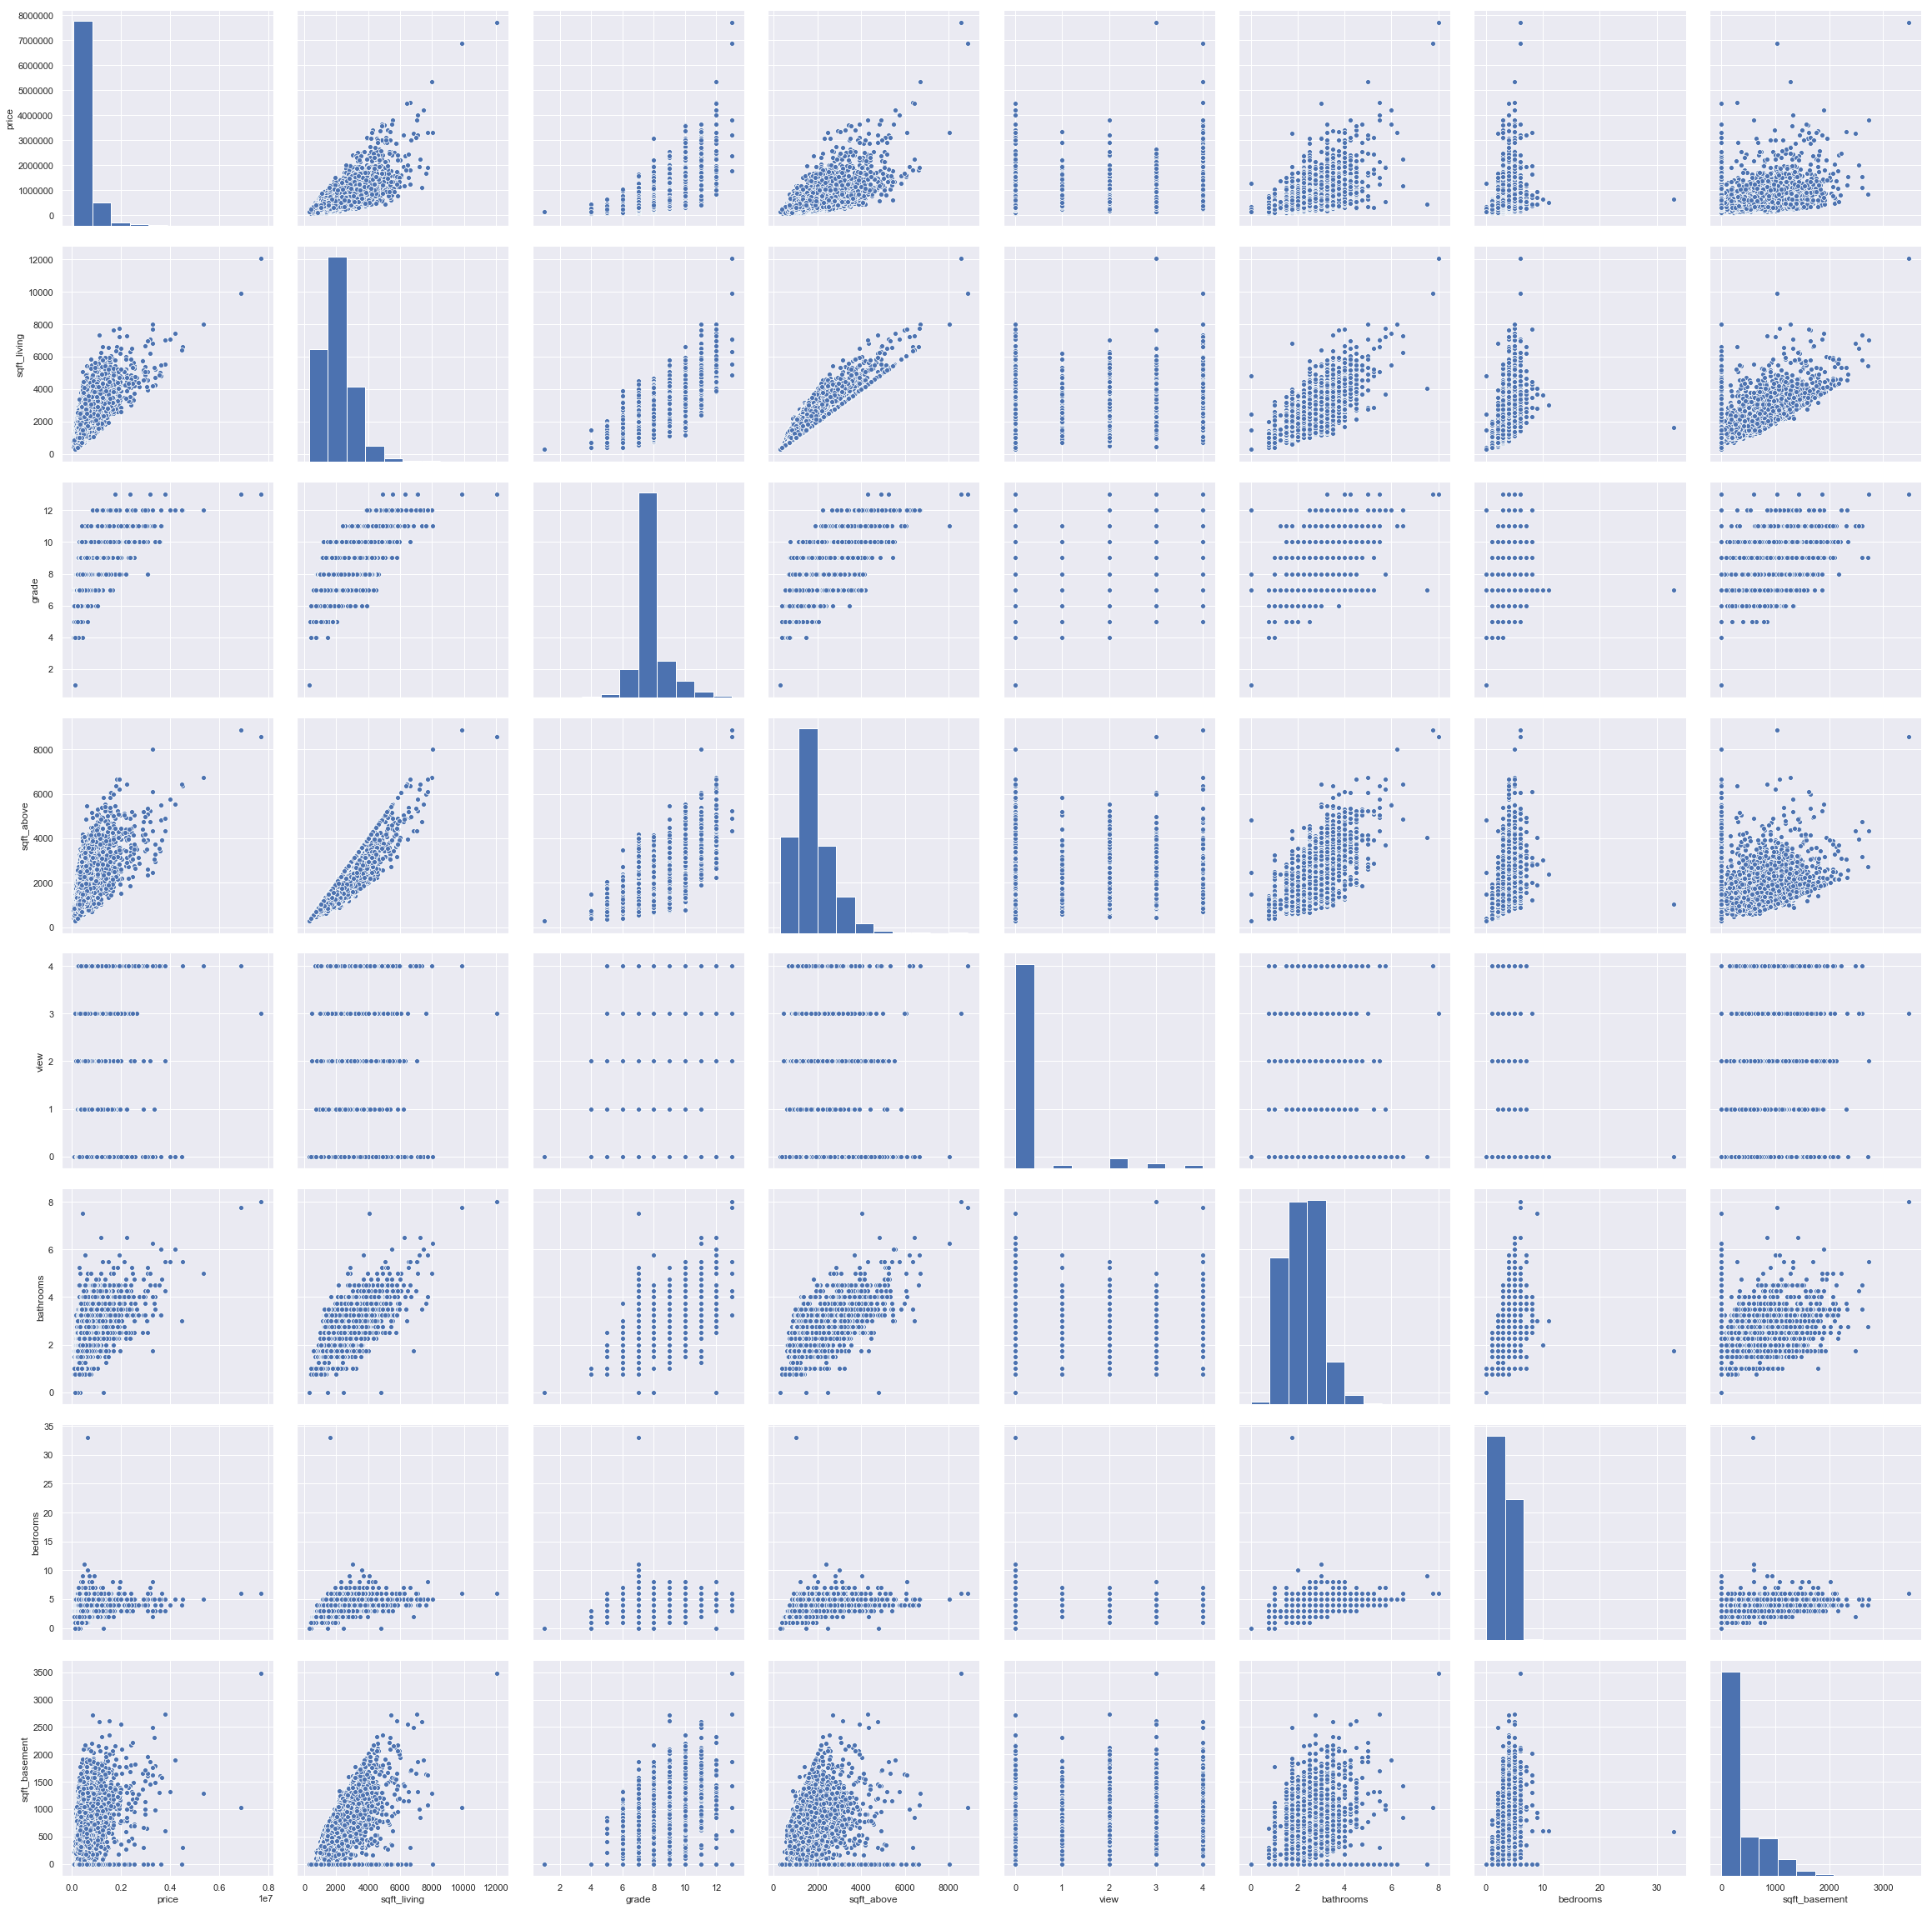

In [11]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(train[cols], height = 4)
plt.show();

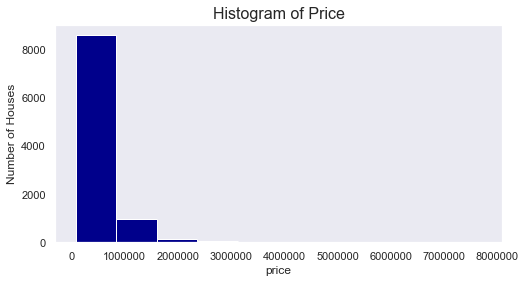

In [12]:
train.hist(column="price", 
          grid=False,         
          figsize = (8,4),
          color = "darkblue",
          edgecolor = "white")  

plt.xlabel("price", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.title("Histogram of Price", fontsize=16)


plt.show()

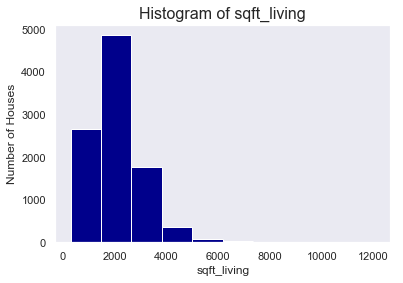

In [13]:
train.hist(column="sqft_living", 
          grid=False,         
          figsize = (6,4),
          color = "darkblue",
          edgecolor = "white")  

plt.xlabel("sqft_living", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.title("Histogram of sqft_living", fontsize=16)


plt.show()

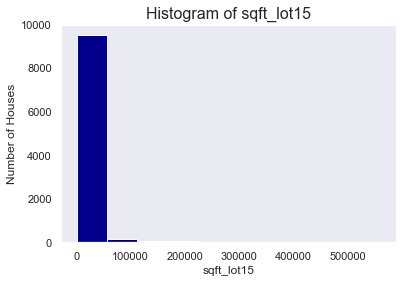

In [14]:
train.hist(column="sqft_lot15", 
          grid=False,         
          figsize = (6,4),
          color = "darkblue",
          edgecolor = "white")  

plt.xlabel("sqft_lot15", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.title("Histogram of sqft_lot15", fontsize=16)


plt.show()

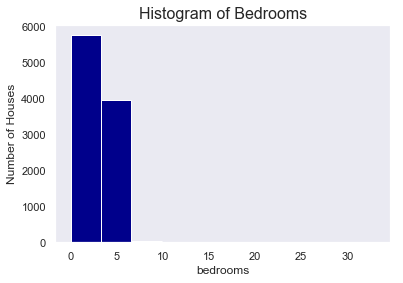

In [15]:
train.hist(column="bedrooms", 
          grid=False,         
          figsize = (6,4),
          color = "darkblue",
          edgecolor = "white")  

plt.xlabel("bedrooms", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.title("Histogram of Bedrooms", fontsize=16)


plt.show()

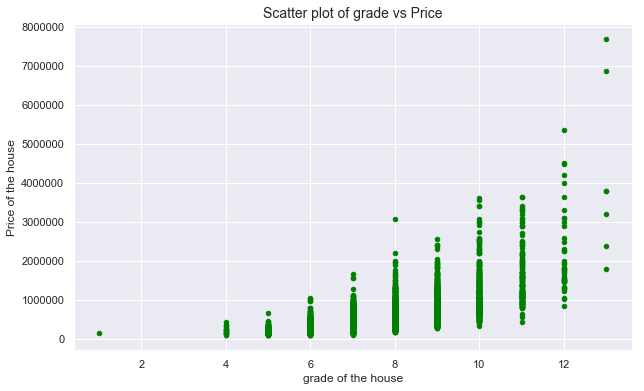

In [16]:
train.plot(kind='scatter',x='grade',y='price',figsize=(10,6),color='green')
plt.ylabel('Price of the house', fontsize=12)
plt.xlabel('grade of the house', fontsize=12)
plt.title('Scatter plot of grade vs Price',fontsize=14)
plt.show()

In [17]:
print(train.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


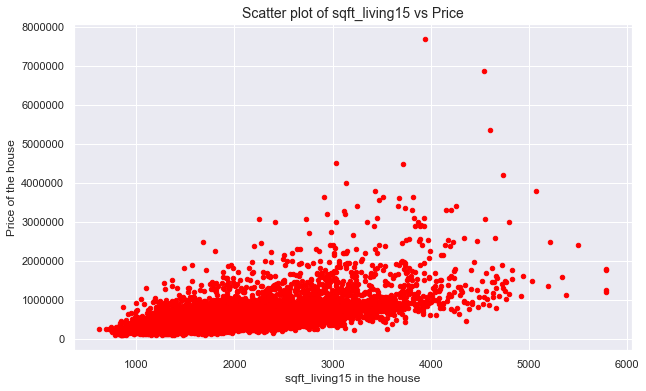

In [18]:
train.plot(kind='scatter',x='sqft_living15',y='price',figsize=(10,6),color='red')
plt.ylabel('Price of the house', fontsize=12)
plt.xlabel('sqft_living15 in the house', fontsize=12)
plt.title('Scatter plot of sqft_living15 vs Price',fontsize=14)
plt.show()

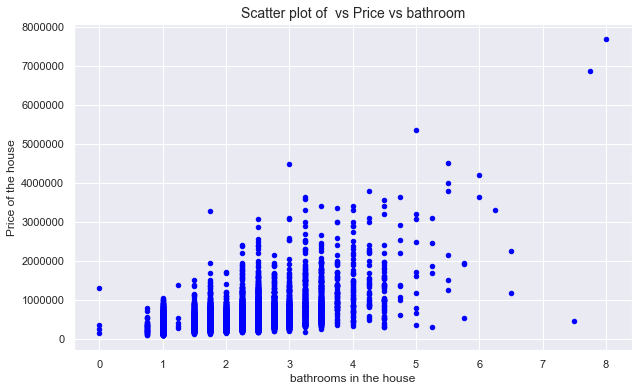

In [19]:
train.plot(kind='scatter',x='bathrooms',y='price',figsize=(10,6),color='blue')
plt.ylabel('Price of the house', fontsize=12)
plt.xlabel('bathrooms in the house', fontsize=12)
plt.title('Scatter plot of  vs Price vs bathroom',fontsize=14)
plt.show()

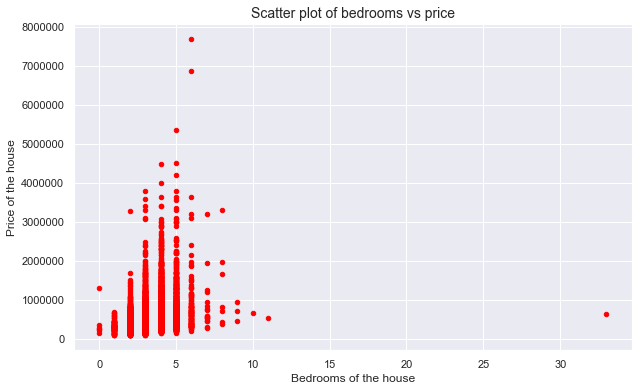

In [20]:
train.plot(kind='scatter',x='bedrooms',y='price',figsize=(10,6),color='red')
plt.ylabel('Price of the house', fontsize=12)
plt.xlabel('Bedrooms of the house', fontsize=12)
plt.title('Scatter plot of bedrooms vs price',fontsize=14)
plt.show()

##### price, sqft_living, Sqft_lot, Sqft_living15, sqft_lot15 variable need to log transformed due to skewed distribution.

## Linear Regression Modelling

In [21]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [22]:
#print(train_data.head())
train_data.shape



(9761, 21)

In [23]:

index=train_data[train_data.bedrooms==33].index
train=train_data.drop(index,axis=0)
train=train.drop(['id','date'],axis=1)



In [24]:
#creating dummy variables for the zip codes
dummies=pd.get_dummies(train.zipcode)

In [25]:
#adding dummy values of zip code to the train data
train=pd.concat([train,dummies], axis=1)

print(train.head())
print(train.columns)

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   604000.0         4       3.00         1960      5000     1.0           0   
1  1225000.0         4       4.50         5420    101930     1.0           0   
2   468000.0         2       1.00         1160      6000     1.0           0   
3   310000.0         3       1.00         1430     19901     1.5           0   
4   400000.0         3       1.75         1370      9680     1.0           0   

   view  condition  grade  ...  98146  98148  98155  98166  98168  98177  \
0     0          5      7  ...      0      0      0      0      0      0   
1     0          3     11  ...      0      0      0      0      0      0   
2     0          4      7  ...      0      0      0      0      0      0   
3     0          4      7  ...      0      0      0      0      0      0   
4     0          4      7  ...      0      0      0      0      0      0   

   98178  98188  98198  98199  
0      0      0      0      0 

In [26]:
train = train.drop('zipcode',axis=1)
train.shape
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#taking log values of the varibales to normalize the distribution
train['price'] = np.log(train['price'])
train['sqft_living'] = np.log(train['sqft_living'])
train['sqft_living15'] = np.log(train['sqft_living15'])
train['sqft_lot'] = np.log(train['sqft_lot'])
train['sqft_lot15'] = np.log(train['sqft_lot15']) 


In [28]:
y_train= train.price.values
X_train= train.iloc[:,2:]

print('dependent variables',y_train[1:10])
print('independent variables',X_train[1:10])


dependent variables [14.0184514  13.05622357 12.64432758 12.89921983 13.38472764 13.09190417
 12.86099861 12.56024446 12.43995829]
independent variables    bathrooms  sqft_living   sqft_lot  floors  waterfront  view  condition  \
1       4.50     8.597851  11.532042     1.0           0     0          3   
2       1.00     7.056175   8.699515     1.0           0     0          4   
3       1.00     7.265430   9.898525     1.5           0     0          4   
4       1.75     7.222566   9.177817     1.0           0     0          4   
5       3.00     7.989560   8.517193     2.0           0     3          3   
6       1.00     7.377759   8.366370     1.5           0     0          4   
7       1.75     7.390181   8.513185     1.0           0     0          4   
8       2.50     7.727535   8.748305     2.0           0     0          3   
9       1.50     6.975414   9.173988     1.0           0     0          3   

   grade  sqft_above  sqft_basement  ...  98146  98148  98155  98166  98168 

##### treating the validation set as same way trian set has been done

In [29]:
validation_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [30]:
index2=validation_data[validation_data.bedrooms==33].index
valid=validation_data.drop(index2,axis=0)
valid=validation_data.drop(['id','date'],axis=1)
valid.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [31]:
dummies2=pd.get_dummies(valid.zipcode)
valid=pd.concat([valid,dummies2],axis=1)
valid.head()
valid.shape

(9635, 89)

In [32]:
valid=valid.drop('zipcode',axis=1)

In [33]:
valid.shape

(9635, 88)

In [34]:
#taking log tranformationon the same variabkes as training set

valid['price'] = np.log(valid['price'])
valid['sqft_living'] = np.log(valid['sqft_living'])
valid['sqft_living15'] = np.log(valid['sqft_living15'])
valid['sqft_lot'] = np.log(valid['sqft_lot'])
valid['sqft_lot15'] = np.log(valid['sqft_lot15'])

In [35]:
y_valid=valid.price.values
X_valid=valid.iloc[:,2:]
print('y_valid values' ,y_valid[1:10])
print('X_valid values' ,X_valid[1:10])

y_valid values [13.19561384 12.10071213 13.142166   12.458775   12.58399525 12.34365831
 13.40377584 12.88664104 12.34583459]
X_valid values    bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
1       2.25     7.851661  8.887653     2.0           0     0          3   
2       1.00     6.646391  9.210340     1.0           0     0          3   
3       2.00     7.426549  8.997147     1.0           0     0          3   
4       2.25     7.447168  8.827468     2.0           0     0          3   
5       1.50     6.966024  9.181015     1.0           0     0          3   
6       1.00     7.484369  8.918650     1.0           0     0          3   
7       2.50     8.177516  9.189729     1.0           0     0          3   
8       2.00     7.544332  9.549666     2.0           0     0          3   
9       1.00     7.130899  9.187481     1.0           0     0          4   

   grade  sqft_above  sqft_basement  ...  98146  98148  98155  98166  98168  \
1      7        217

In [38]:
print('validation set size',valid.shape)
print('trainig data size',train.shape)

validation set size (9635, 88)
trainig data size (9760, 88)


In [39]:
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
y_pred
    


array([12.35546678, 13.209199  , 12.47414118, ..., 13.22188561,
       12.90440717, 12.91669149])

In [40]:
accuracy_1= lr.score(X_valid,y_valid)
"Accuracy 1: {}%".format(int(round(accuracy_1* 100)))

'Accuracy 1: 88%'

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [42]:
r_square1=r2_score(y_valid,y_pred)
r_square1

0.8805371984512905

In [43]:
adjusted_r1=1-(1-r_square1)*(len(y_valid)-1)/(len(y_valid)-X_valid.shape[1]-1)
print('Adjusted r2 is',adjusted_r1)
Y_valtrans=np.exp(y_valid)
Y_predvaltrans=np.exp(y_pred)

#finding the rmse vale
rmse_reg=np.sqrt(np.mean((np.array(Y_valtrans)-Y_predvaltrans)**2))
mse_reg=mean_squared_error(np.array(Y_valtrans),Y_predvaltrans)
rmse_reg=np.sqrt(mse_reg)
print('RMSE is ',rmse_reg)

Adjusted r2 is 0.8794611824339896
RMSE is  122563.07459289789


#### Prediction of the values using the Test data 

In [44]:
#treatement for the test data as training data

bed=test_data[test_data['bedrooms']==33].index
test = test_data.drop(bed, axis=0)
test=test_data.drop(['id','date'],axis=1)
test.head(3)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,530000.0,5,2.0,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,189000.0,2,1.0,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095


In [45]:
dummies3= pd.get_dummies(test.zipcode)
test=pd.concat([test,dummies3],axis=1)
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#test=test.drop('zipcode',axis=1)
test['price'] = np.log(test['price'])
test['sqft_living'] = np.log(test['sqft_living'])
test['sqft_living15'] = np.log(test['sqft_living15'])
test['sqft_lot'] = np.log(test['sqft_lot'])
test['sqft_lot15'] = np.log(test['sqft_lot15'])
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,12.685408,3,2.50,7.544332,8.788746,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,13.180632,5,2.00,7.501082,8.486734,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,12.149502,2,1.00,7.090077,9.195227,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,13.440817,4,1.75,7.753624,8.517193,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,12.388394,4,1.00,7.106606,8.996528,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,12.911642,4,2.50,7.590852,8.521185,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2213,12.868761,3,2.50,7.695303,8.735847,2.0,0,2,3,8,...,0,0,0,0,0,0,0,0,1,0
2214,13.318752,4,3.50,7.955074,8.626406,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2215,12.345835,3,1.75,7.038784,7.090910,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_test=test.price.values
X_test=test.iloc[:,2:]

In [48]:
X_test=X_test.drop('zipcode',1)

In [49]:
X_valid.head()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1.00,7.073270,8.639411,1.0,0,0,3,7,1180,0,...,0,0,0,0,0,0,1,0,0,0
1,2.25,7.851661,8.887653,2.0,0,0,3,7,2170,400,...,0,0,0,0,0,0,0,0,0,0
2,1.00,6.646391,9.210340,1.0,0,0,3,6,770,0,...,0,0,0,0,0,0,0,0,0,0
3,2.00,7.426549,8.997147,1.0,0,0,3,8,1680,0,...,0,0,0,0,0,0,0,0,0,0
4,2.25,7.447168,8.827468,2.0,0,0,3,7,1715,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y_pred= lr.predict(X_test)
Y_pred

array([12.66389506, 13.26880783, 12.23133594, ..., 13.07244425,
       12.59127767, 13.02794973])

In [51]:
accuracy_2 = lr.score(X_test, y_test)
"Accuracy 2: {}%".format(int(round(accuracy_2* 100)))

'Accuracy 2: 88%'

In [52]:
adjusted_r1=1-(1-r_square1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted r2 is',adjusted_r1)
Y_valtrans=np.exp(y_test)
Y_predvaltrans=np.exp(Y_pred)

#finding the rmse vale
rmse_reg=np.sqrt(np.mean((np.array(Y_valtrans)-Y_predvaltrans)**2))
mse_reg=mean_squared_error(np.array(Y_valtrans),Y_predvaltrans)
rmse_reg=np.sqrt(mse_reg)
print('RMSE is ',rmse_reg)

Adjusted r2 is 0.8757138177314835
RMSE is  124812.11871084898


### Adjusted R Square value is : 0.875713 & RMSE is : 124812.118

## Forward selection method 

### Selected variable : Bedrooms

In [53]:
train= train_data[['price','bedrooms']]
index=train[train['bedrooms']==33].index
train = train.drop(index, axis=0)
Y_train=np.array(train.price)
X_train=np.array(train.bedrooms)


In [54]:
X_train=X_train.reshape(-1,1)
lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_train)
Y_predictor

array([625076.10864637, 625076.10864637, 362456.61595284, ...,
       625076.10864637, 362456.61595284, 362456.61595284])

In [55]:
accuracy_3= lr.score(X_train, Y_train)
"Accuracy 3: {}%".format(int(round(accuracy_3* 100)))

'Accuracy 3: 10%'

In [56]:
val=validation_data[['price','bedrooms']]
index=val[val['bedrooms']==33].index
val = val.drop(index, axis=0)
X_val=np.array(val.bedrooms)
Y_val=np.array(val.price)
X_val=X_val.reshape(-1,1)
lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_val)
Y_predictor


array([493766.3622996 , 493766.3622996 , 362456.61595284, ...,
       493766.3622996 , 625076.10864637, 493766.3622996 ])

In [57]:
accuracy_4= lr.score(X_val, Y_val)
"Accuracy 4: {}%".format(int(round(accuracy_4* 100)))

'Accuracy 4: 10%'

In [58]:
r_square=r2_score(Y_val,Y_predictor)
r_square

0.09566409417129718

In [59]:
adjusted_r=1-(1-r_square)*(len(Y_val)-1)/(len(Y_val)-X_val.shape[1]-1)
adjusted_r

0.09557021522332376

In [60]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_val)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_val),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

338918.219884489

In [61]:
rmse_table=pd.DataFrame(columns=['step','variables','RMSE','Adjusted R Square Value'])
rmse_table=rmse_table.append({'step':'1', 'variables':'bedrooms','RMSE':rmse_reg2,'Adjusted R Square Value':adjusted_r}, ignore_index=True)
rmse_table

,step,variables,RMSE,Adjusted R Square Value
0,1,bedrooms,338918.219884,0.09557


###  Variables used : sqft_living,zipcode

In [62]:
train=train_data.loc[:,['price','sqft_living','zipcode']]

dummies=pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies], axis=1)

train=train.drop('zipcode',1)
train

train['price']= np.log(train.price)
train['sqft_living']= np.log(train.sqft_living)

Y_train =train.price.values
X_train=train.drop('price',1)


print(X_train)
print(Y_train)

      sqft_living  98001  98002  98003  98004  98005  98006  98007  98008  \
0        7.580700      0      0      0      0      0      0      0      0   
1        8.597851      0      0      0      0      0      0      0      0   
2        7.056175      0      0      0      0      0      0      0      0   
3        7.265430      0      0      0      0      0      0      0      0   
4        7.222566      0      0      0      0      0      0      0      0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
9756     7.306531      0      0      0      0      0      0      0      0   
9757     7.832014      0      0      0      0      0      0      0      0   
9758     8.163371      0      0      0      0      0      0      0      0   
9759     6.927558      0      0      0      0      0      0      0      0   
9760     6.927558      0      0      0      0      0      0      0      0   

      98010  ...  98146  98148  98155  98166  98168  98177  98178  98188  \

In [63]:
val=validation_data.loc[:,['price','sqft_living','zipcode']]


dummies=pd.get_dummies(val.zipcode)
val=pd.concat([val,dummies], axis=1)

val=val.drop('zipcode',1)

val['price']= np.log(val.price)
val['sqft_living']= np.log(val.sqft_living)

Y_val =val.price.values
X_val =val.drop('price',1)

lr= LinearRegression()

lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_val)
Y_predictor

array([12.3261261 , 13.3405304 , 12.28419495, ..., 13.24000549,
       12.95057678, 12.98338318])

In [64]:
accuracy_6= lr.score(X_val, Y_val)
"Accuracy 6: {}%".format(int(round(accuracy_6* 100)))

'Accuracy 6: 81%'

In [65]:
r_square=r2_score(Y_val,Y_predictor)
r_square

0.8097307604053354

In [66]:
adjusted_r=1-(1-r_square)*(len(Y_val)-1)/(len(Y_val)-X_val.shape[1]-1)
adjusted_r

0.8083181162548365

In [67]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_val)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_val),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

0.22734681673430507

In [68]:
rmse_table=rmse_table.append({'step':'2', 'variables':'Zipcode,sqft_living','RMSE':rmse_reg2,'Adjusted R Square Value':adjusted_r}, ignore_index=True)
rmse_table

,step,variables,RMSE,Adjusted R Square Value
0,1,bedrooms,338918.219884,0.095570
1,2,"Zipcode,sqft_living",0.227347,0.808318


#### Variables used : 'sqft_living','zipcode','bedrooms','grade

In [69]:
train= train_data[['price','bedrooms','sqft_living','zipcode','grade']]
index=train[train['bedrooms']==33].index
train = train.drop(index, axis=0)

dummies=pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies], axis=1)
train=train.drop('zipcode',1)

train['price']= np.log(train.price)
train['sqft_living']= np.log(train.sqft_living)


Y_train =train.price.values
X_train=train.drop('price',1)


print(X_train)
print(Y_train)


      bedrooms  sqft_living  grade  98001  98002  98003  98004  98005  98006  \
0            4     7.580700      7      0      0      0      0      0      0   
1            4     8.597851     11      0      0      0      0      0      0   
2            2     7.056175      7      0      0      0      0      0      0   
3            3     7.265430      7      0      0      0      0      0      0   
4            3     7.222566      7      0      0      0      0      0      0   
...        ...          ...    ...    ...    ...    ...    ...    ...    ...   
9756         3     7.306531      8      0      0      0      0      0      0   
9757         4     7.832014      9      0      0      0      0      0      0   
9758         4     8.163371      9      0      0      0      0      0      0   
9759         2     6.927558      7      0      0      0      0      0      0   
9760         2     6.927558      7      0      0      0      0      0      0   

      98007  ...  98146  98148  98155  

In [70]:
val= validation_data.loc[:,['price','bedrooms','sqft_living','zipcode','grade']]
index=val[val['bedrooms']==33].index
val = val.drop(index, axis=0)

dummies=pd.get_dummies(val.zipcode)
val=pd.concat([val,dummies], axis=1)
val=val.drop('zipcode',1)

val['price']= np.log(val.price)
val['sqft_living']= np.log(val.sqft_living)

Y_val =val.price.values
X_val=val.drop('price',1)

print(X_val)
print(Y_val)

      bedrooms  sqft_living  grade  98001  98002  98003  98004  98005  98006  \
0            3     7.073270      7      0      0      0      0      0      0   
1            3     7.851661      7      0      0      0      0      0      0   
2            2     6.646391      6      0      0      0      0      0      0   
3            3     7.426549      8      0      0      0      0      0      0   
4            3     7.447168      7      0      0      1      0      0      0   
...        ...          ...    ...    ...    ...    ...    ...    ...    ...   
9630         3     7.313220      6      0      0      0      0      0      0   
9631         3     7.177782      8      0      0      0      0      0      0   
9632         3     7.333023      8      0      0      0      0      0      0   
9633         4     7.745003      8      0      0      0      0      0      0   
9634         3     7.377759      8      0      0      0      0      0      0   

      98007  ...  98146  98148  98155  

In [71]:
lr= LinearRegression()

lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_val)
Y_predictor

array([12.40882874, 13.23019409, 12.30142212, ..., 13.31771851,
       12.98965454, 13.0357666 ])

In [72]:
accuracy_8= lr.score(X_val, Y_val)
"Accuracy 8: {}%".format(int(round(accuracy_8* 100)))

'Accuracy 8: 84%'

In [73]:
r_square=r2_score(Y_val,Y_predictor)
r_square

0.8383479616109163

In [74]:
adjusted_r=1-(1-r_square)*(len(Y_val)-1)/(len(Y_val)-X_val.shape[1]-1)
adjusted_r

0.8371137184561832

In [75]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_val)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_val),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

0.2095536255377275

In [76]:
rmse_table=rmse_table.append({'step':'3', 'variables':'bedrooms ,sqft_living,zipcode,grade','RMSE':rmse_reg2,'Adjusted R Square Value':adjusted_r}, ignore_index=True)
rmse_table

,step,variables,RMSE,Adjusted R Square Value
0,1,bedrooms,338918.219884,0.095570
1,2,"Zipcode,sqft_living",0.227347,0.808318
2,3,"bedrooms ,sqft_living,zipcode,grade",0.209554,0.837114


### Variables used : 'sqft_living','bedrooms','zipcode',Condition,grade

In [77]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [78]:
train= train_data[['price','bedrooms','sqft_living','zipcode','grade','condition']]
index=train[train['bedrooms']==33].index
train = train.drop(index, axis=0)

dummies=pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies], axis=1)
train=train.drop('zipcode',1)

train['price']= np.log(train.price)
train['sqft_living']= np.log(train.sqft_living)


Y_train =train.price.values
X_train=train.drop('price',1)


print(X_train)
print(Y_train)

      bedrooms  sqft_living  grade  condition  98001  98002  98003  98004  \
0            4     7.580700      7          5      0      0      0      0   
1            4     8.597851     11          3      0      0      0      0   
2            2     7.056175      7          4      0      0      0      0   
3            3     7.265430      7          4      0      0      0      0   
4            3     7.222566      7          4      0      0      0      0   
...        ...          ...    ...        ...    ...    ...    ...    ...   
9756         3     7.306531      8          3      0      0      0      0   
9757         4     7.832014      9          3      0      0      0      0   
9758         4     8.163371      9          3      0      0      0      0   
9759         2     6.927558      7          3      0      0      0      0   
9760         2     6.927558      7          3      0      0      0      0   

      98005  98006  ...  98146  98148  98155  98166  98168  98177  98178  \

In [79]:
val= validation_data.loc[:,['price','bedrooms','sqft_living','zipcode','grade','condition']]
index=val[val['bedrooms']==33].index
val = val.drop(index, axis=0)

dummies=pd.get_dummies(val.zipcode)
val=pd.concat([val,dummies], axis=1)
val=val.drop('zipcode',1)

val['price']= np.log(val.price)
val['sqft_living']= np.log(val.sqft_living)

Y_val =val.price.values
X_val=val.drop('price',1)

print(X_val)
print(Y_val)


      bedrooms  sqft_living  grade  condition  98001  98002  98003  98004  \
0            3     7.073270      7          3      0      0      0      0   
1            3     7.851661      7          3      0      0      0      0   
2            2     6.646391      6          3      0      0      0      0   
3            3     7.426549      8          3      0      0      0      0   
4            3     7.447168      7          3      0      0      1      0   
...        ...          ...    ...        ...    ...    ...    ...    ...   
9630         3     7.313220      6          3      0      0      0      0   
9631         3     7.177782      8          3      0      0      0      0   
9632         3     7.333023      8          3      0      0      0      0   
9633         4     7.745003      8          3      0      0      0      0   
9634         3     7.377759      8          3      0      0      0      0   

      98005  98006  ...  98146  98148  98155  98166  98168  98177  98178  \

In [80]:
lr= LinearRegression()

lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_val)
Y_predictor

array([12.39875031, 13.20365524, 12.28434372, ..., 13.29739761,
       12.9737854 , 13.01353455])

In [81]:
r_square=r2_score(Y_val,Y_predictor)
r_square

0.8428297819217881

In [82]:
adjusted_r=1-(1-r_square)*(len(Y_val)-1)/(len(Y_val)-X_val.shape[1]-1)
adjusted_r

0.8416131923676262

In [83]:
accuracy_6= lr.score(X_val, Y_val)
"Accuracy 6: {}%".format(int(round(accuracy_6* 100)))

'Accuracy 6: 84%'

In [84]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_val)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_val),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

0.20662825797240594

In [85]:
rmse_table=rmse_table.append({'step':'4', 'variables':'bedrooms ,sqft_living,zipcode,grade,condition','RMSE':rmse_reg2,'Adjusted R Square Value':adjusted_r}, ignore_index=True)
rmse_table

,step,variables,RMSE,Adjusted R Square Value
0,1,bedrooms,338918.219884,0.095570
1,2,"Zipcode,sqft_living",0.227347,0.808318
2,3,"bedrooms ,sqft_living,zipcode,grade",0.209554,0.837114
3,4,"bedrooms ,sqft_living,zipcode,grade,condition",0.206628,0.841613


###  Variables used : 'sqft_living','bedrooms','zipcode',Condition,grade,floor

In [86]:
train= train_data[['price','bedrooms','sqft_living','zipcode','grade','condition','floors']]
index=train[train['bedrooms']==33].index
train = train.drop(index, axis=0)

dummies=pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies], axis=1)
train=train.drop('zipcode',1)

train['price']= np.log(train.price)
train['sqft_living']= np.log(train.sqft_living)


Y_train =train.price.values
X_train=train.drop('price',1)


print(X_train)
print(Y_train)

      bedrooms  sqft_living  grade  condition  floors  98001  98002  98003  \
0            4     7.580700      7          5     1.0      0      0      0   
1            4     8.597851     11          3     1.0      0      0      0   
2            2     7.056175      7          4     1.0      0      0      0   
3            3     7.265430      7          4     1.5      0      0      0   
4            3     7.222566      7          4     1.0      0      0      0   
...        ...          ...    ...        ...     ...    ...    ...    ...   
9756         3     7.306531      8          3     3.0      0      0      0   
9757         4     7.832014      9          3     2.0      0      0      0   
9758         4     8.163371      9          3     2.0      0      0      0   
9759         2     6.927558      7          3     2.0      0      0      0   
9760         2     6.927558      7          3     2.0      0      0      0   

      98004  98005  ...  98146  98148  98155  98166  98168  981

In [87]:
val= validation_data.loc[:,['price','bedrooms','sqft_living','zipcode','grade','condition','floors']]
index=val[val['bedrooms']==33].index
val = val.drop(index, axis=0)

dummies=pd.get_dummies(val.zipcode)
val=pd.concat([val,dummies], axis=1)
val=val.drop('zipcode',1)

val['price']= np.log(val.price)
val['sqft_living']= np.log(val.sqft_living)

Y_val =val.price.values
X_val=val.drop('price',1)

print(X_val)
print(Y_val)


      bedrooms  sqft_living  grade  condition  floors  98001  98002  98003  \
0            3     7.073270      7          3     1.0      0      0      0   
1            3     7.851661      7          3     2.0      0      0      0   
2            2     6.646391      6          3     1.0      0      0      0   
3            3     7.426549      8          3     1.0      0      0      0   
4            3     7.447168      7          3     2.0      0      0      1   
...        ...          ...    ...        ...     ...    ...    ...    ...   
9630         3     7.313220      6          3     1.0      0      0      0   
9631         3     7.177782      8          3     2.0      0      0      0   
9632         3     7.333023      8          3     3.0      0      0      0   
9633         4     7.745003      8          3     2.0      0      0      0   
9634         3     7.377759      8          3     2.0      0      0      0   

      98004  98005  ...  98146  98148  98155  98166  98168  981

In [88]:
lr= LinearRegression()

lr.fit(X_train,Y_train)
Y_predictor= lr.predict(X_val)
Y_predictor

array([12.40524292, 13.18978119, 12.28479767, ..., 13.2670517 ,
       12.96100616, 13.00262451])

In [89]:
r_square=r2_score(Y_val,Y_predictor)
r_square

0.8435667881766877

In [90]:
adjusted_r=1-(1-r_square)*(len(Y_val)-1)/(len(Y_val)-X_val.shape[1]-1)
adjusted_r

0.8423394117893305

In [91]:
accuracy_6= lr.score(X_val, Y_val)
"Accuracy 6: {}%".format(int(round(accuracy_6* 100)))

'Accuracy 6: 84%'

In [92]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_val)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_val),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

0.20614322567311283

In [93]:
rmse_table=rmse_table.append({'step':'5', 'variables':'bedrooms ,sqft_living,zipcode,grade,condition,floors','RMSE':rmse_reg2,'Adjusted R Square Value':adjusted_r}, ignore_index=True)
rmse_table

,step,variables,RMSE,Adjusted R Square Value
0,1,bedrooms,338918.219884,0.095570
1,2,"Zipcode,sqft_living",0.227347,0.808318
2,3,"bedrooms ,sqft_living,zipcode,grade",0.209554,0.837114
3,4,"bedrooms ,sqft_living,zipcode,grade,condition",0.206628,0.841613
4,5,"bedrooms ,sqft_living,zipcode,grade,condition,...",0.206143,0.842339


### Using the Test data to validate the model

In [94]:


bed=test_data[test_data['bedrooms']==33].index
test = test_data.drop(bed, axis=0)
test=test_data.drop(['id','date'],axis=1)
test.drop('zipcode',1)

dummies3= pd.get_dummies(test.zipcode)
test=pd.concat([test,dummies3],axis=1)
test.drop('zipcode',1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,405000.0,4,2.50,1980,5020,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2213,388000.0,3,2.50,2198,6222,2.0,0,2,3,8,...,0,0,0,0,0,0,0,0,1,0
2214,608500.0,4,3.50,2850,5577,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2215,230000.0,3,1.75,1140,1201,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [95]:
test['price'] = np.log(test['price'])
test['sqft_living'] = np.log(test['sqft_living'])
test['sqft_living15'] = np.log(test['sqft_living15'])
test['sqft_lot'] = np.log(test['sqft_lot'])
test['sqft_lot15'] = np.log(test['sqft_lot15'])
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,12.685408,3,2.50,7.544332,8.788746,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,13.180632,5,2.00,7.501082,8.486734,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,12.149502,2,1.00,7.090077,9.195227,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,13.440817,4,1.75,7.753624,8.517193,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,12.388394,4,1.00,7.106606,8.996528,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [96]:
Y_test=test.price.values
X_test=test.drop('price',1)

In [97]:

lr= LinearRegression()

lr.fit(X_test,Y_test)
Y_predictor= lr.predict(X_test)
Y_predictor




array([12.65239668, 13.26362514, 12.19898605, ..., 13.14656878,
       12.58896685, 13.01798201])

In [98]:
accuracy_2 = lr.score(X_test, Y_test)
"Accuracy 2: {}%".format(int(round(accuracy_2* 100)))

'Accuracy 2: 89%'

In [99]:
r_square=r2_score(Y_test,Y_predictor)
r_square

0.8858290519351675

In [100]:
adjusted_r=1-(1-r_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
adjusted_r

0.8811076969400052

In [101]:
rmse_reg2=np.sqrt(np.mean((np.array(Y_test)-Y_predictor)**2))
mse_reg2=mean_squared_error(np.array(Y_test),Y_predictor)
rmse_reg2=np.sqrt(mse_reg2)
rmse_reg2

0.17867702468248267

### Adjusted R Square value is : 0.88110 & RMSE is : 0.178677

## Comparison and conclusions

### Model1
**Number of Variables used - 17
**Final R2 score : 88% ,RMSE: 127092.82
### Model2
**Number of varibales used - 06
**Final R2 score 88% ,RMSE- 0.1786